In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages("fpc")
library(fpc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [ ]:
install.packages("ipred")
library(ipred)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’




In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hardhat’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice



In [ ]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("e1071", type = "source")
install.packages("clusterSim")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("e1071", type = "source"):
“installation of package ‘e1071’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘e1071’


Warning message in install.packages("clusterSim"):
“installation of package ‘e1071’ had non-zero exit status”
Warning message in install.packages("clusterSim"):
“installation of package ‘clusterSim’ had non-zero exit status”


In [ ]:
install.packages("clusterSim")
library(clusterSim)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘e1071’


Warning message in install.packages("clusterSim"):
“installation of package ‘e1071’ had non-zero exit status”
Warning message in install.packages("clusterSim"):
“installation of package ‘clusterSim’ had non-zero exit status”


ERROR: Error in library(clusterSim): there is no package called ‘clusterSim’


In [ ]:
install.packages("cluster")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(scipen = 999)
options(dplyr.summarise.inform = FALSE)

# Data Import and Initial Transformation

In [ ]:
data <- read_csv("/content/digital_wallet_ltv_dataset.csv")

Rows: 7000 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Customer_ID, Location, Income_Level, App_Usage_Frequency, Preferre...
dbl (15): Age, Total_Transactions, Avg_Transaction_Value, Max_Transaction_Va...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# lower-case names
names(data) <- tolower(names(data))

In [ ]:
# convert rupees to USD
data <- data %>%
  mutate(
    avg_transaction_value  = avg_transaction_value  * 0.011,
    total_spent            = total_spent            * 0.011,
    max_transaction_value  = max_transaction_value  * 0.011,
    min_transaction_value  = min_transaction_value  * 0.011
  )

In [ ]:
str(data)

tibble [7,000 × 20] (S3: tbl_df/tbl/data.frame)
 $ customer_id                : chr [1:7000] "cust_0000" "cust_0001" "cust_0002" "cust_0003" ...
 $ age                        : num [1:7000] 54 67 44 30 58 23 36 54 34 38 ...
 $ location                   : chr [1:7000] "Urban" "Suburban" "Urban" "Rural" ...
 $ income_level               : chr [1:7000] "Low" "High" "High" "High" ...
 $ total_transactions         : num [1:7000] 192 979 329 71 878 741 946 63 297 245 ...
 $ avg_transaction_value      : num [1:7000] 184.1 159.9 77.7 180.7 118.8 ...
 $ max_transaction_value      : num [1:7000] 662 532 358 196 192 ...
 $ min_transaction_value      : num [1:7000] 71.8 24.1 30.2 48 49.9 ...
 $ total_spent                : num [1:7000] 35347 156546 25555 12829 104307 ...
 $ active_days                : num [1:7000] 140 229 73 299 236 195 88 97 166 296 ...
 $ last_transaction_days_ago  : num [1:7000] 209 240 21 285 329 93 255 162 303 252 ...
 $ loyalty_points_earned      : num [1:7000] 2114 2960 3

In [ ]:

describe_numeric <- function(df) {
  num_df <- df %>% select(where(is.numeric))

  # For each numeric column, compute count/mean/std/quantiles/etc.
  stats_list <- lapply(num_df, function(x) {
    x_no_na <- x[!is.na(x)]
    c(
      count = length(x_no_na),
      mean  = mean(x_no_na),
      std   = sd(x_no_na),
      min   = min(x_no_na),
      `25%` = quantile(x_no_na, 0.25),
      `50%` = quantile(x_no_na, 0.50),
      `75%` = quantile(x_no_na, 0.75),
      max   = max(x_no_na)
    )
  })

  # Combine into one data frame: rows = statistics, columns = variables
  out <- as.data.frame(do.call(cbind, stats_list))
  out <- tibble::rownames_to_column(out, var = "statistic")
  out
}


In [ ]:
numeric_tbl<- describe_numeric(data)

In [ ]:
tbl_transposed <-
  numeric_tbl %>%
  column_to_rownames("statistic") %>%  # make statistic rownames
  t() %>%                              # transpose
  as.data.frame() %>%
  rownames_to_column("variable")       # restore variable names

In [ ]:
tbl_transposed

variable,count,mean,std,min,25%.25%,50%.50%,75%.75%,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,7000,42.63371,15.516036,16.00000000,29.00000,43.00000,56.00000,69.00000
total_transactions,7000,501.22143,286.277311,1.00000000,252.00000,506.00000,744.00000,1000.00000
avg_transaction_value,7000,109.41515,63.589689,0.11204409,53.98213,108.25290,164.50554,219.96090
max_transaction_value,7000,331.75556,241.957197,0.35043233,134.46762,280.16331,489.66956,1086.90166
min_transaction_value,7000,32.79705,24.170764,0.05079763,13.56373,27.20499,48.16635,109.08732
total_spent,7000,55022.24073,48295.447818,16.47957988,15003.89836,41317.15423,84100.58490,214145.00447
active_days,7000,181.93486,105.102598,1.00000000,90.00000,182.00000,273.00000,365.00000
last_transaction_days_ago,7000,183.84771,105.063709,1.00000000,93.00000,184.00000,275.00000,365.00000
loyalty_points_earned,7000,2501.54543,1446.680026,0.00000000,1254.75000,2466.00000,3792.25000,5000.00000


In [ ]:


describe_categorical <- function(df) {
  df %>%
    # keep only character or factor columns
    select(where(~ is.character(.) || is.factor(.))) %>%
    purrr::map_df(
      ~{
        x <- .
        x <- x[!is.na(x)]
        if (length(x) == 0) {
          tibble(
            count  = 0L,
            unique = 0L,
            top    = NA_character_,
            freq   = 0L
          )
        } else {
          tab <- sort(table(x), decreasing = TRUE)
          tibble(
            count  = length(x),
            unique = dplyr::n_distinct(x),
            top    = names(tab)[1],
            freq   = as.integer(tab[1])
          )
        }
      },
      .id = "variable"
    )
}


In [ ]:
tbl_categorical<-describe_categorical(data)

In [ ]:
tbl_categorical

variable,count,unique,top,freq
<chr>,<int>,<int>,<chr>,<int>
customer_id,7000,7000,cust_0000,1
location,7000,3,Urban,2368
income_level,7000,3,Middle,2391
app_usage_frequency,7000,3,Daily,2346
preferred_payment_method,7000,4,UPI,1791


In [ ]:
library(dplyr)
library(tidyr)

tbl_cat_wide <- tbl_categorical %>%
  # make all stats columns character so they can live in one "value" column
  mutate(across(c(count, unique, top, freq), as.character)) %>%
  pivot_longer(
    cols = c(count, unique, top, freq),
    names_to  = "statistic",
    values_to = "value"
  ) %>%
  pivot_wider(
    names_from  = variable,
    values_from = value
  ) %>%
  arrange(match(statistic, c("count", "unique", "top", "freq")))

tbl_cat_wide


statistic,customer_id,location,income_level,app_usage_frequency,preferred_payment_method
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
count,7000,7000,7000,7000,7000
unique,7000,3,3,3,4
top,cust_0000,Urban,Middle,Daily,UPI
freq,1,2368,2391,2346,1791


In [ ]:
# drop customer_id
data <- data %>% select(-customer_id)

# Dummy Encoding and Scaling (for KMeans and Supervised)

In [ ]:
# Make character columns factors
data_factor <- data %>%
  mutate(across(where(is.character), as.factor))

In [ ]:
# Numeric columns (15 continuous features)
numeric_cols <- c(
  "age", "total_transactions", "avg_transaction_value",
  "max_transaction_value", "min_transaction_value",
  "total_spent", "active_days", "last_transaction_days_ago",
  "loyalty_points_earned", "referral_count", "cashback_received",
  "support_tickets_raised", "issue_resolution_time",
  "customer_satisfaction_score", "ltv"
)


In [ ]:
# -------- Unsup: full dummies, no drop_first (dummies_for_kmeans) --------
dummies_for_kmeans <- fastDummies::dummy_cols(
  data_factor,
  remove_first_dummy = FALSE,
  remove_selected_columns = TRUE
)

In [ ]:
# Put numeric columns first like Python (first 15 → scaled)
dummies_for_kmeans <- dummies_for_kmeans %>%
  select(all_of(numeric_cols), everything())

In [ ]:
# scale continuous features only
scaled_numeric <- scale(dummies_for_kmeans[, numeric_cols])

In [ ]:
data_for_kmeans <- cbind(
  as.data.frame(scaled_numeric),
  dummies_for_kmeans[, setdiff(names(dummies_for_kmeans), numeric_cols), drop = FALSE]
)

In [ ]:
# -------- Sup: dummies with drop_first = TRUE (data_for_supervised) ------
data_for_supervised <- fastDummies::dummy_cols(
  data_factor,
  remove_first_dummy = TRUE,
  remove_selected_columns = TRUE
)

# KMeans: silhouette & Davies-Bouldin (Elbow-style)

In [ ]:
davies_bouldin <- function(X, clusters) {
  X <- as.matrix(X)
  cl <- as.integer(clusters)
  cl_ids <- sort(unique(cl))
  k <- length(cl_ids)

  # 1. Cluster centroids
  centers <- sapply(cl_ids, function(c) colMeans(X[cl == c, , drop = FALSE]))
  centers <- t(centers)  # k x p

  # 2. S_i: average distance of points in cluster i to its centroid
  S <- numeric(k)
  for (i in seq_len(k)) {
    Xi <- X[cl == cl_ids[i], , drop = FALSE]
    ci <- centers[i, , drop = FALSE]
    diffs <- Xi - matrix(ci, nrow = nrow(Xi), ncol = ncol(Xi), byrow = TRUE)
    S[i] <- mean(sqrt(rowSums(diffs^2)))
  }

  # 3. M_ij: distances between centroids
  M <- as.matrix(dist(centers))

  # 4. R_ij = (S_i + S_j) / M_ij, R_i = max_j R_ij, DB = mean_i R_i
  R <- matrix(0, nrow = k, ncol = k)
  for (i in seq_len(k)) {
    for (j in seq_len(k)) {
      if (i != j) {
        R[i, j] <- (S[i] + S[j]) / M[i, j]
      }
    }
  }

  Ri <- apply(R, 1, max)
  mean(Ri)
}


In [ ]:
library(cluster)  # for silhouette()

set.seed(0)

k_vals    <- 2:9
sil_score <- numeric(length(k_vals))
db_index  <- numeric(length(k_vals))

dmat <- dist(clustering_data)

for (i in seq_along(k_vals)) {
  k  <- k_vals[i]
  km <- kmeans(clustering_data, centers = k, nstart = 10)

  ## Silhouette (cluster package)
  sil <- cluster::silhouette(km$cluster, dmat)
  sil_score[i] <- mean(sil[, "sil_width"])

  ## Davies–Bouldin (our own implementation)
  db_index[i] <- davies_bouldin(clustering_data, km$cluster)
}


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 350000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 350000)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 350000)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


In [ ]:
sil_df <- data.frame(
  k = k_vals,
  silhouette_score = sil_score
)

db_df <- data.frame(
  k = k_vals,
  db_index = db_index
)


In [ ]:


sil_df


k,silhouette_score
<int>,<dbl>
2,0.10603793
3,0.06415193
4,0.04967432
5,0.04563390
6,0.04484390
7,0.04407649
8,0.04480137
9,0.04467779


In [ ]:
## Davies–Bouldin table


db_df      # tibble view


k,db_index
<int>,<dbl>
2,2.761278
3,3.508483
4,3.953018
5,3.695834
6,3.519570
7,3.281365
8,3.281587
9,3.145037


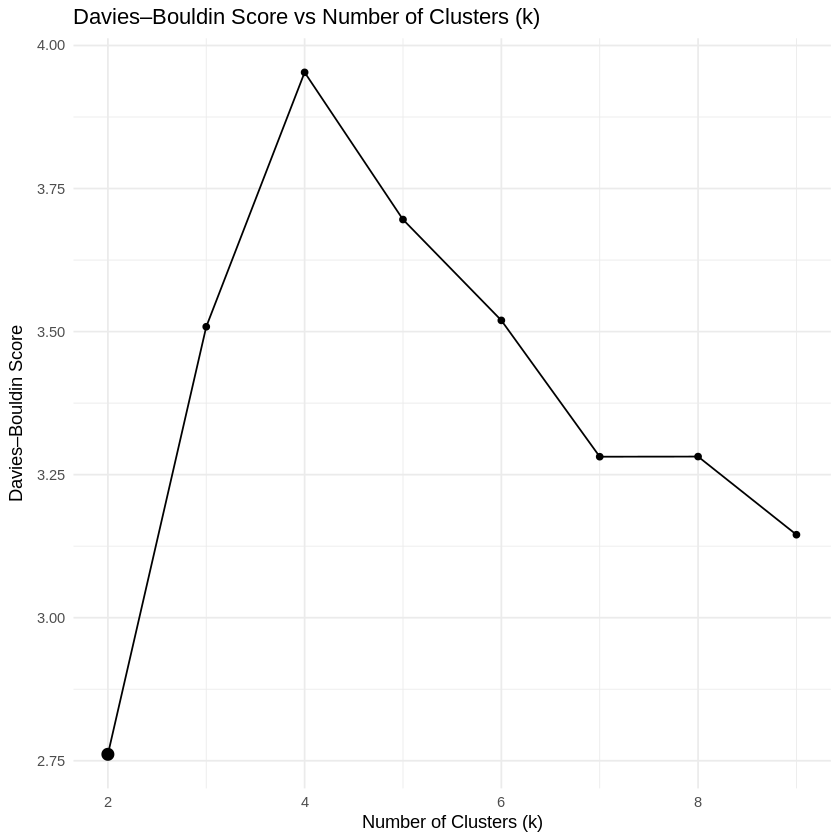

In [ ]:
# Davies–Bouldin vs k
ggplot(db_df, aes(x = k, y = db_index)) +
  geom_line() +
  geom_point() +
  geom_point(
    data = db_df %>% filter(db_index == min(db_index)),
    size = 3
  ) +
  labs(
    title = "Davies–Bouldin Score vs Number of Clusters (k)",
    x = "Number of Clusters (k)",
    y = "Davies–Bouldin Score"
  ) +
  theme_minimal()



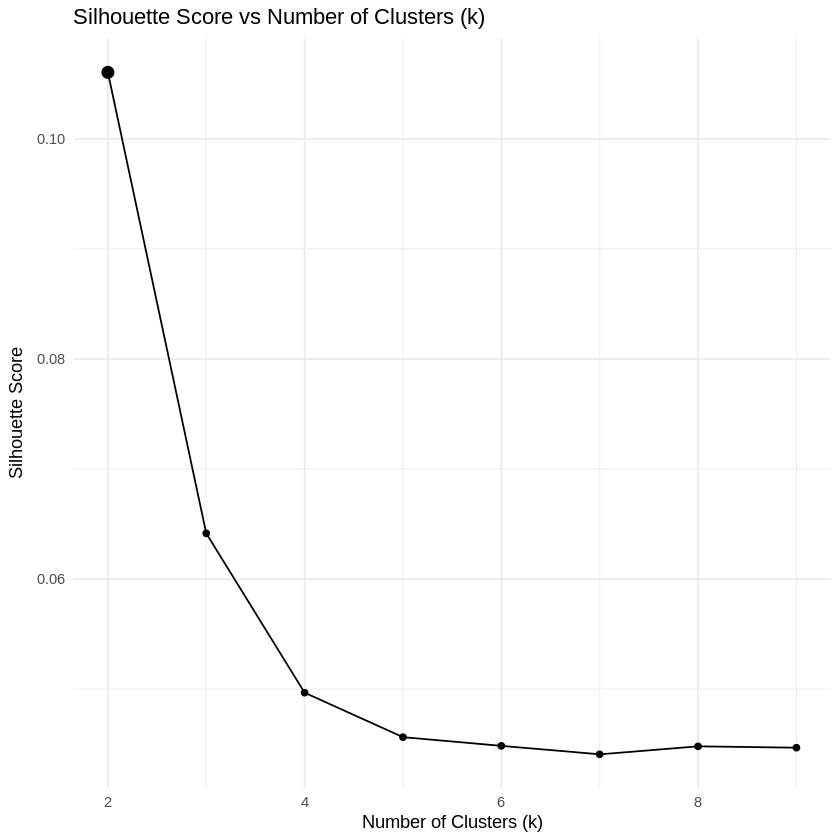

In [ ]:
# Silhouette vs k
ggplot(sil_df, aes(x = k, y = silhouette_score)) +
  geom_line() +
  geom_point() +
  geom_point(data = sil_df %>% filter(silhouette_score == max(silhouette_score)),
             size = 3) +
  labs(
    title = "Silhouette Score vs Number of Clusters (k)",
    x = "Number of Clusters (k)",
    y = "Silhouette Score"
  ) +
  theme_minimal()

# Two-Cluster vs Three-Cluster Solutions

In [ ]:
set.seed(0)

# Fit KMeans with k = 2 (random_state=0, n_init=10)
km2 <- kmeans(
  clustering_data,
  centers   = 2,
  nstart    = 10,      # n_init = 10
  iter.max  = 300,     # to ensure convergence
  algorithm = "Lloyd"
)

clust2_labels <- km2$cluster

# Attach labels back to data_for_kmeans
two_clusters <- data_for_kmeans %>%
  mutate(label = clust2_labels)

# Recover original-scale LTV using mean & std from *data* (original scale)
mean_ltv <- mean(data$ltv)   # <- lowercase
std_ltv  <- sd(data$ltv)     # <- lowercase

two_clusters <- two_clusters %>%
  mutate(
    ltv_original = ltv * std_ltv + mean_ltv
  )

# Group by label and compute summary stats (mean, median, std, var, count)
two_clusters_summary <- two_clusters %>%
  group_by(label) %>%
  summarise(
    mean   = mean(ltv_original),
    median = median(ltv_original),
    std    = sd(ltv_original),
    var    = var(ltv_original),
    count  = n(),
    .groups = "drop"
  ) %>%
  arrange(desc(mean))

two_clusters_summary


label,mean,median,std,var,count
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,777366.8,747014.7,462259.2,213683603741,3260
1,280540.7,209660.7,244142.9,59605733161,3740


In [ ]:
# ---------------------------------------------------------
# THREE CLUSTERS (R recreation of Python version)
# ---------------------------------------------------------

set.seed(0)

# Fit k-means with k = 3
km3 <- kmeans(
  clustering_data,
  centers   = 3,
  nstart    = 10,
  iter.max  = 300,
  algorithm = "Lloyd"
)

# Cluster labels
clust3_labels <- km3$cluster

# Add labels back to the dataset used for clustering
three_clusters <- data_for_kmeans %>%
  mutate(label = clust3_labels)

# Recover ORIGINAL SCALE LTV using same formula as Python:
#    ltv_original = ltv * std_ltv + mean_ltv

three_clusters <- three_clusters %>%
  mutate(ltv_original = ltv * std_ltv + mean_ltv)

# Produce summary stats by cluster
three_clusters_summary <- three_clusters %>%
  group_by(label) %>%
  summarise(
    mean   = mean(ltv_original),
    median = median(ltv_original),
    std    = sd(ltv_original),
    var    = var(ltv_original),
    count  = n(),
    .groups = "drop"
  ) %>%
  arrange(desc(mean))   # sort_values(by="mean", ascending=False)

three_clusters_summary


label,mean,median,std,var,count
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,798052.1,772480.0,469027.6,219986899955,2874
1,340415.1,261044.4,290379.8,84320435389,2000
2,286456.2,208275.9,262489.6,68900782129,2126


In [ ]:
potential_clusters <- data %>%
  bind_cols(
    clust2_label = clust2_labels,
    clust3_label = clust3_labels
  )


In [ ]:
library(ggplot2)
library(scales)
library(dplyr)

get_box <- function(df, label_col) {

  n_clusters <- n_distinct(df[[label_col]])

  # Colors & legend labels
  if (n_clusters == 2) {
    pal <- c("0" = "green", "1" = "red")
    legend_labels <- c("High LTV", "Low LTV")
  } else {
    pal <- c("0" = "green", "1" = "red", "2" = "pink")
    legend_labels <- c("High LTV", "Low LTV", "Avg LTV")
  }

  p <- ggplot(df, aes(
    x    = factor(.data[[label_col]]),
    y    = ltv,              # NOTE: original-scale LTV column
    fill = factor(.data[[label_col]])
  )) +
    geom_boxplot() +
    scale_fill_manual(values = pal, labels = legend_labels) +
    scale_y_continuous(labels = dollar_format()) +
    labs(
      x    = "Cluster",
      y    = "LTV (USD)",
      fill = "Potential Cluster",
      title = paste0("Boxplots\nDistribution of LTV if ", n_clusters, " Clusters")
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title      = element_text(hjust = 0.5, face = "bold"),
      legend.position = "right"
    )

  print(p)
}


In [ ]:
library(ggplot2)
library(scales)
library(dplyr)

get_box <- function(df, label_col) {

  # figure out which cluster is High / Low (/ Avg) by mean LTV
  cluster_stats <- df %>%
    group_by(.data[[label_col]]) %>%
    summarise(mean_ltv = mean(ltv), .groups = "drop") %>%
    arrange(desc(mean_ltv))

  n_clusters <- nrow(cluster_stats)

  high_label <- as.character(cluster_stats[[label_col]][1])
  low_label  <- as.character(cluster_stats[[label_col]][n_clusters])

  if (n_clusters == 2) {
    pal <- c(
      setNames("green", high_label),
      setNames("red",   low_label)
    )
    breaks <- c(high_label, low_label)
    legend_labels <- c("High LTV", "Low LTV")

  } else if (n_clusters == 3) {
    mid_label <- as.character(cluster_stats[[label_col]][2])
    pal <- c(
      setNames("green", high_label),
      setNames("red",   low_label),
      setNames("pink",  mid_label)
    )
    breaks <- c(high_label, low_label, mid_label)
    legend_labels <- c("High LTV", "Low LTV", "Avg LTV")
  } else {
    stop("get_box() currently supports 2 or 3 clusters only.")
  }

  p <- ggplot(df, aes(
    x    = factor(.data[[label_col]]),
    y    = ltv,
    fill = factor(.data[[label_col]])
  )) +
    geom_boxplot() +
    scale_fill_manual(
      values = pal,
      breaks = breaks,
      labels = legend_labels,
      drop   = FALSE
    ) +
    scale_y_continuous(labels = dollar_format()) +  # <-- changed here
    labs(
      x    = "Cluster",
      y    = "LTV (USD)",
      fill = "Potential Cluster",
      title = paste0(
        "Boxplots\nDistribution of LTV if ",
        n_clusters,
        " Clusters"
      )
    ) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title      = element_text(hjust = 0.5, face = "bold"),
      legend.position = "right"
    )

  print(p)
}


         mean   median count
High 777366.8 747014.7  3260
Low  280540.7 209660.7  3740


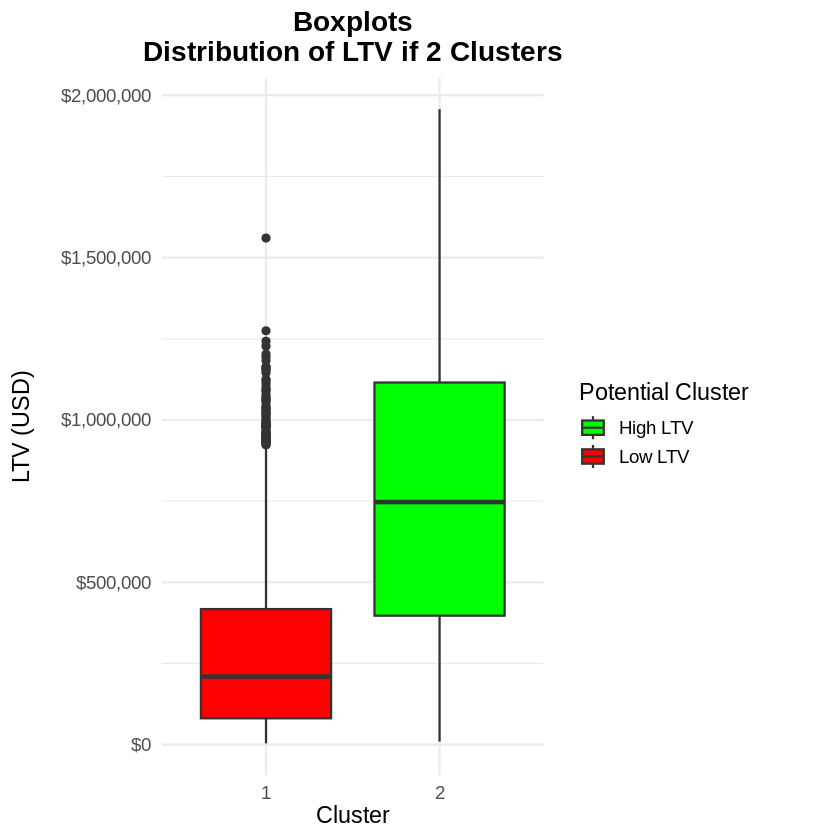

In [ ]:
two_cluster_summary <- potential_clusters %>%
  group_by(clust2_label) %>%
  summarise(
    mean   = mean(ltv),
    median = median(ltv),
    count  = n(),
    .groups = "drop"
  )

# order rows: High first, Low second
idx <- order(two_cluster_summary$mean, decreasing = TRUE)

summary_display <- as.data.frame(
  two_cluster_summary[idx, c("mean", "median", "count")]
)
rownames(summary_display) <- c("High", "Low")

print(summary_display)

get_box(potential_clusters, "clust2_label")


         mean   median count
High 798052.1 772480.0  2874
Med  340415.1 261044.4  2000
Low  286456.2 208275.9  2126


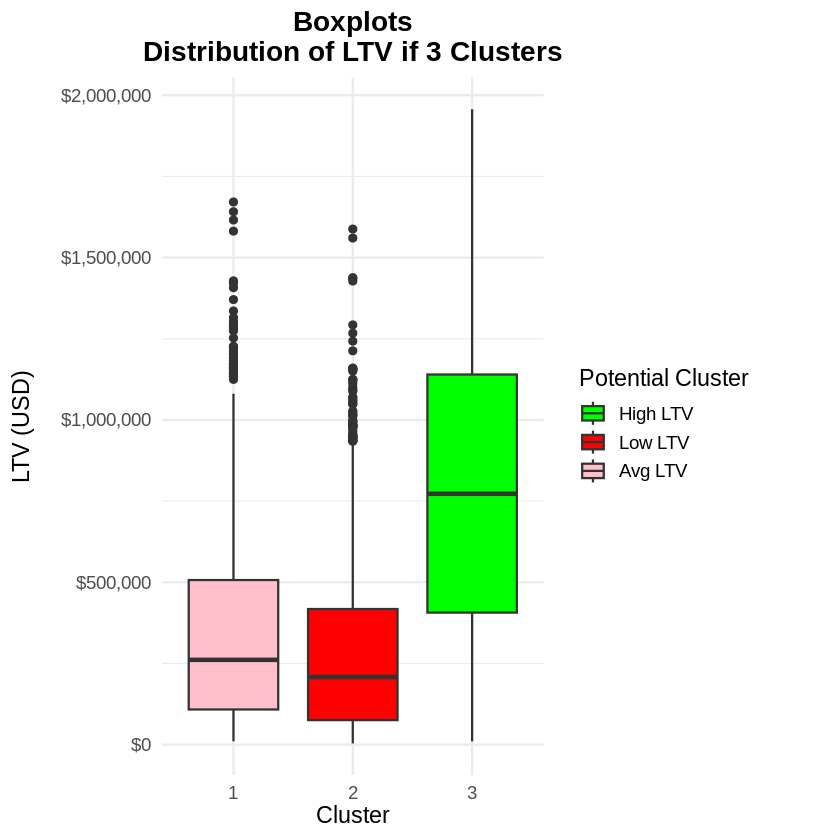

In [ ]:
# --- summary table for 3 clusters ---------------------------------

three_cluster_summary <- potential_clusters %>%
  group_by(clust3_label) %>%
  summarise(
    mean   = mean(ltv),
    median = median(ltv),
    count  = n(),
    .groups = "drop"
  )

# order by mean descending: High, Med, Low
idx3 <- order(three_cluster_summary$mean, decreasing = TRUE)

summary3_display <- as.data.frame(
  three_cluster_summary[idx3, c("mean", "median", "count")]
)

rownames(summary3_display) <- c("High", "Med", "Low")

print(summary3_display)

# --- boxplot for 3 clusters ---------------------------------------

get_box(potential_clusters, "clust3_label")


In [ ]:
library(dplyr)

clustered_data <- potential_clusters

# drop clust3_label – we’re only using the 2-cluster split here
clustered_data <- clustered_data[, !(names(clustered_data) %in% "clust3_label")]

# HIGH cluster is clust2_label == 2  → high_ltv = 1
clustered_data <- clustered_data %>%
  mutate(
    high_ltv = if_else(clust2_label == 2, 1L, 0L),
    customer_value = if_else(high_ltv == 1L, "High", "Low")
  )

# drop clust2_label after using it
clustered_data <- clustered_data[, !(names(clustered_data) %in% "clust2_label")]

# make customer_value a factor with both levels
clustered_data$customer_value <- factor(
  clustered_data$customer_value,
  levels = c("Low", "High")
)

head(clustered_data)


age,location,income_level,total_transactions,avg_transaction_value,max_transaction_value,min_transaction_value,total_spent,active_days,last_transaction_days_ago,⋯,referral_count,cashback_received,app_usage_frequency,preferred_payment_method,support_tickets_raised,issue_resolution_time,customer_satisfaction_score,ltv,high_ltv,customer_value
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
54,Urban,Low,192,184.10022,662.3852,71.78396,35347.24,140,209,⋯,25,2224.012,Monthly,Debit Card,3,61.56859,1,327954.6,1,High
67,Suburban,High,979,159.90408,531.8511,24.05416,156546.10,229,240,⋯,20,4026.824,Monthly,UPI,17,60.39289,8,1437052.9,1,High
44,Urban,High,329,77.67510,357.7327,30.17747,25555.11,73,21,⋯,0,1441.011,Monthly,Debit Card,11,45.30558,4,241938.7,0,Low
30,Rural,High,71,180.69564,196.1069,47.96863,12829.39,299,285,⋯,35,4365.856,Weekly,Wallet Balance,6,22.03019,1,128459.9,1,High
58,Urban,Middle,878,118.80102,192.4740,49.86160,104307.29,236,329,⋯,18,4161.524,Daily,UPI,18,20.63472,5,956951.4,1,High
23,Rural,Middle,741,67.02479,234.4194,22.76606,49665.37,195,93,⋯,5,2597.393,Daily,UPI,6,17.23454,10,467166.6,0,Low


In [ ]:
library(ggplot2)
library(stringr)

multi_group_density_plot <- function(df, var) {
  # var is a string like "age" or "total_spent"

  nice_lab <- str_to_title(gsub("_", " ", var))

  ggplot(df, aes(x = .data[[var]], colour = customer_value)) +
    geom_density(linewidth = 1.4, alpha = 0.9) +
    scale_colour_manual(
      name   = "Customer Lifetime Value",
      values = c("Low" = "red", "High" = "green"),
      breaks = c("Low", "High"),
      labels = c("Low LTV", "High LTV")
    ) +
    labs(
      title = paste0(
        "Multivariate Density Plot (High vs Low LTV Customers)\nDistribution of ",
        nice_lab
      ),
      x = nice_lab,
      y = "Density"
    ) +
    theme_minimal(base_size = 12) +
    theme(
      plot.title      = element_text(hjust = 0.5),
      legend.position = "right",
      legend.justification = c("left", "top"),
      panel.grid.major = element_line(colour = "grey85"),
      panel.grid.minor = element_line(colour = "grey92")
    ) +
    guides(colour = guide_legend(title = "Customer Lifetime Value"))
}


In [ ]:
# numeric columns only
numeric_cols <- names(clustered_data)[sapply(clustered_data, is.numeric)]

# drop the binary label column from plotting
numeric_cols <- setdiff(numeric_cols, "high_ltv")

numeric_cols


[1] "age"                         "total_transactions"         
 [3] "avg_transaction_value"       "max_transaction_value"      
 [5] "min_transaction_value"       "total_spent"                
 [7] "active_days"                 "last_transaction_days_ago"  
 [9] "loyalty_points_earned"       "referral_count"             
[11] "cashback_received"           "support_tickets_raised"     
[13] "issue_resolution_time"       "customer_satisfaction_score"
[15] "ltv"

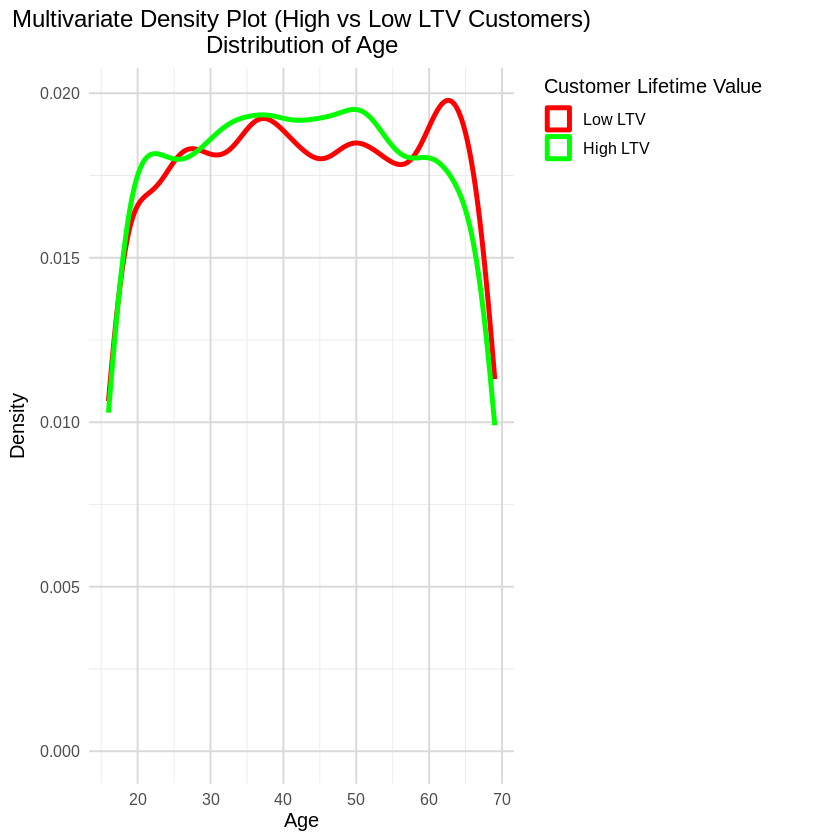

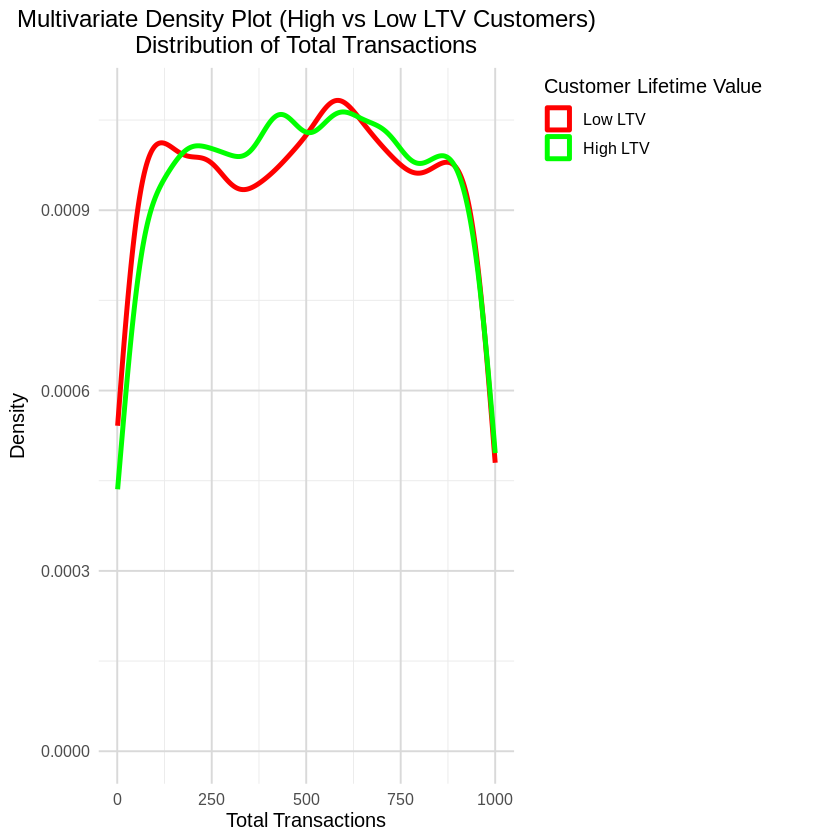

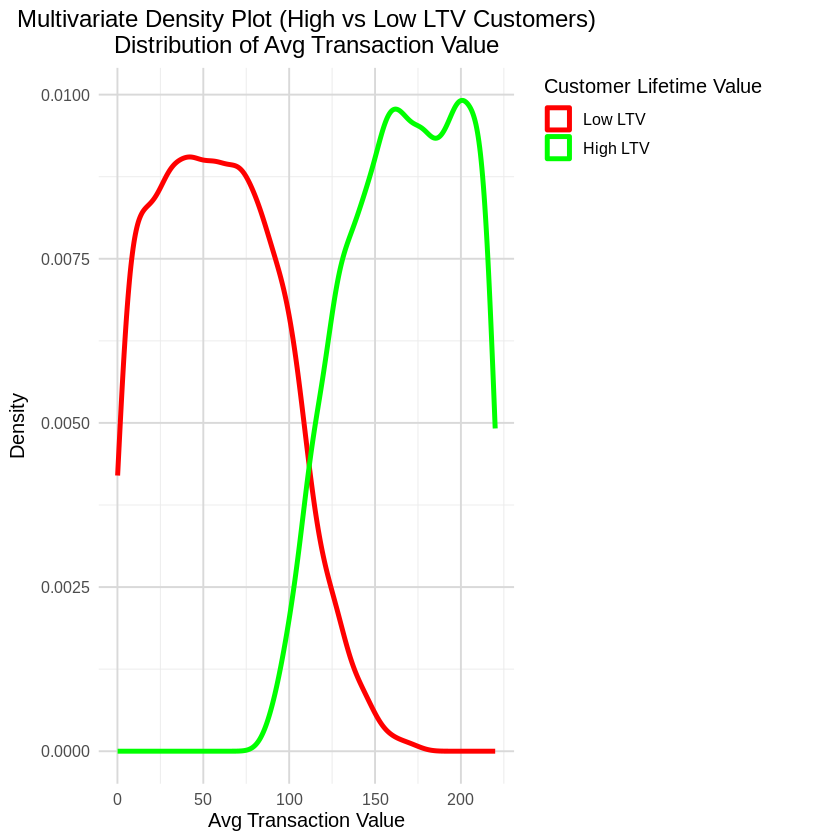

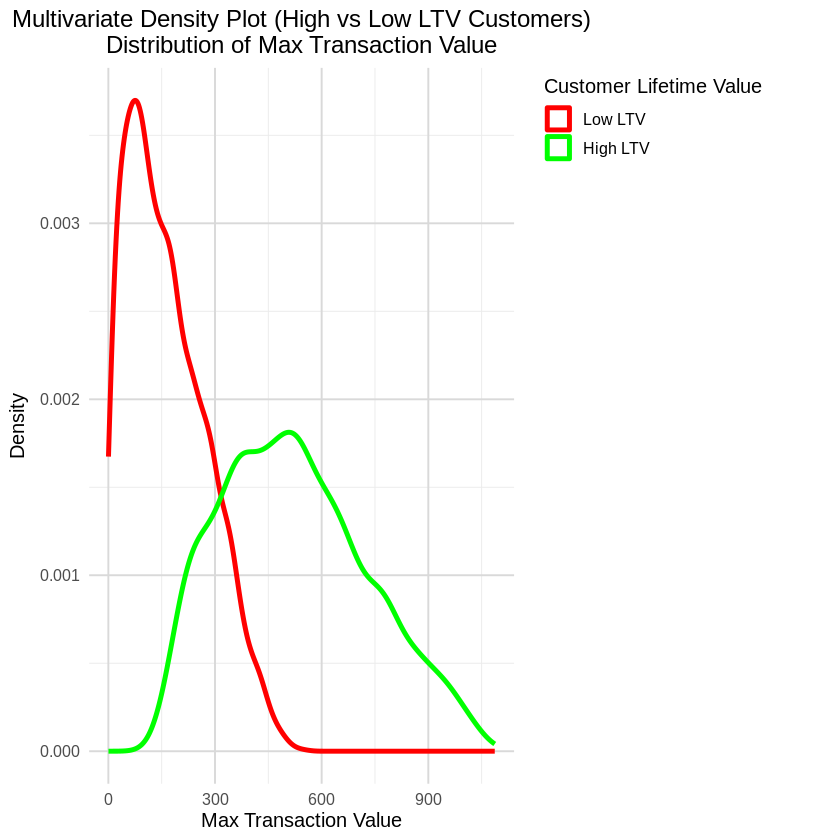

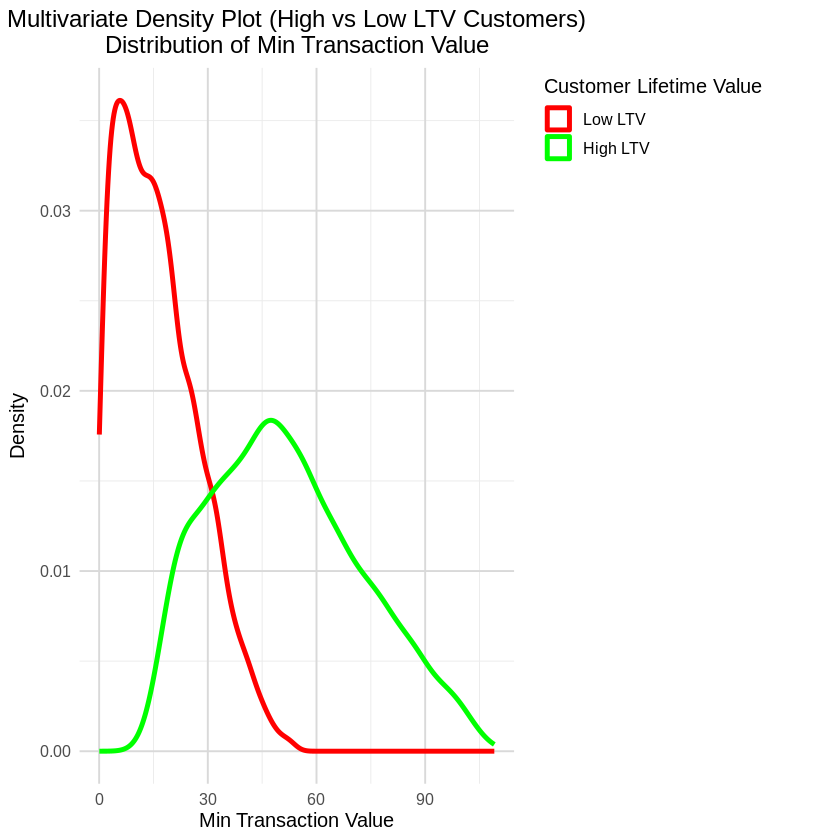

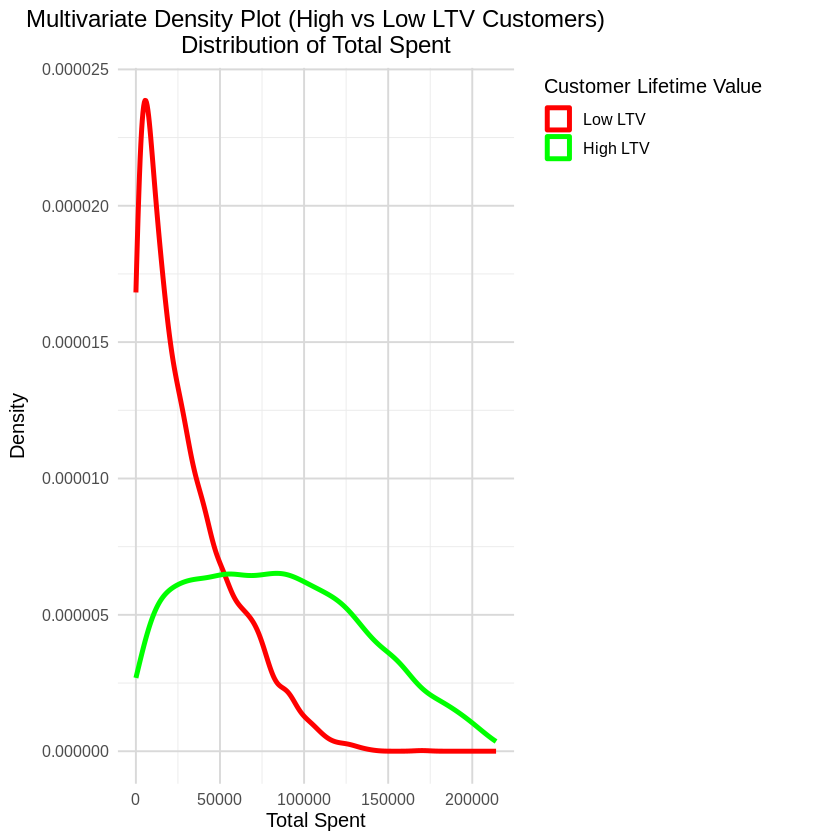

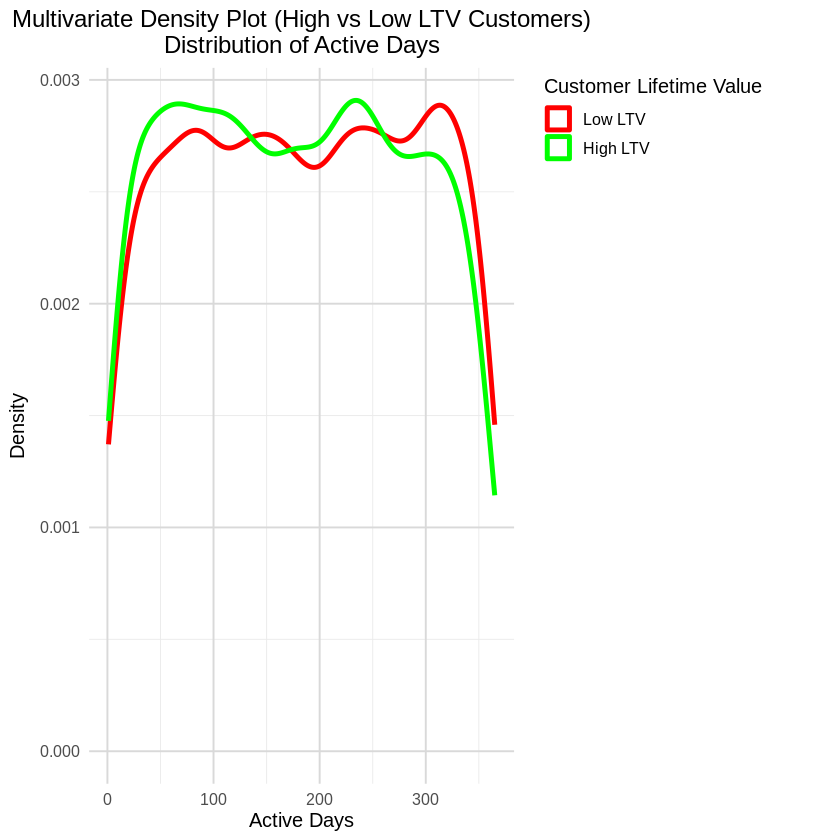

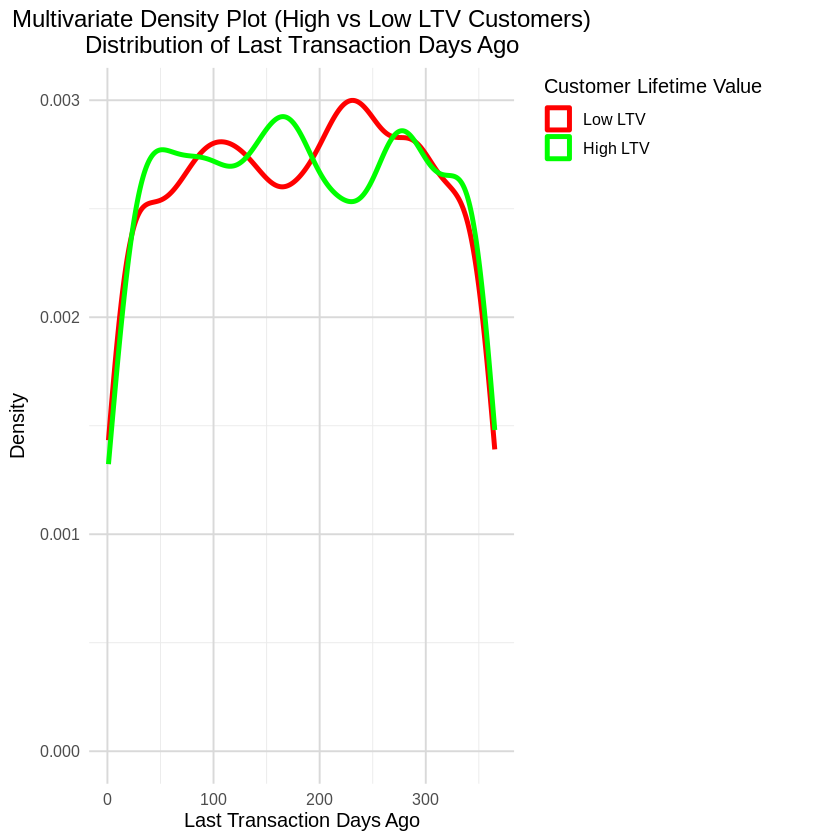

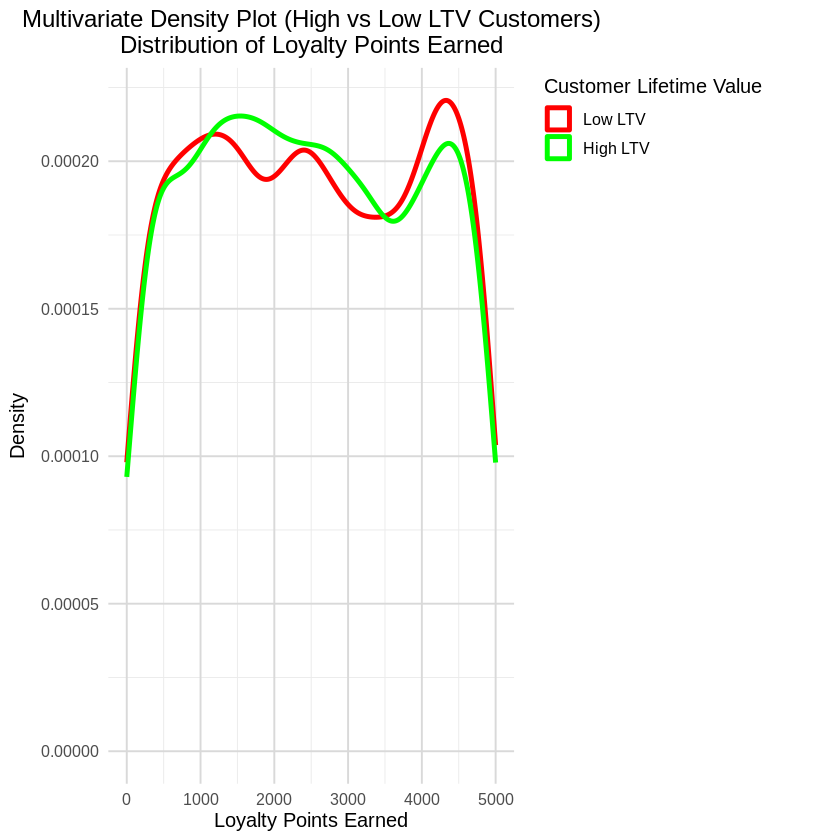

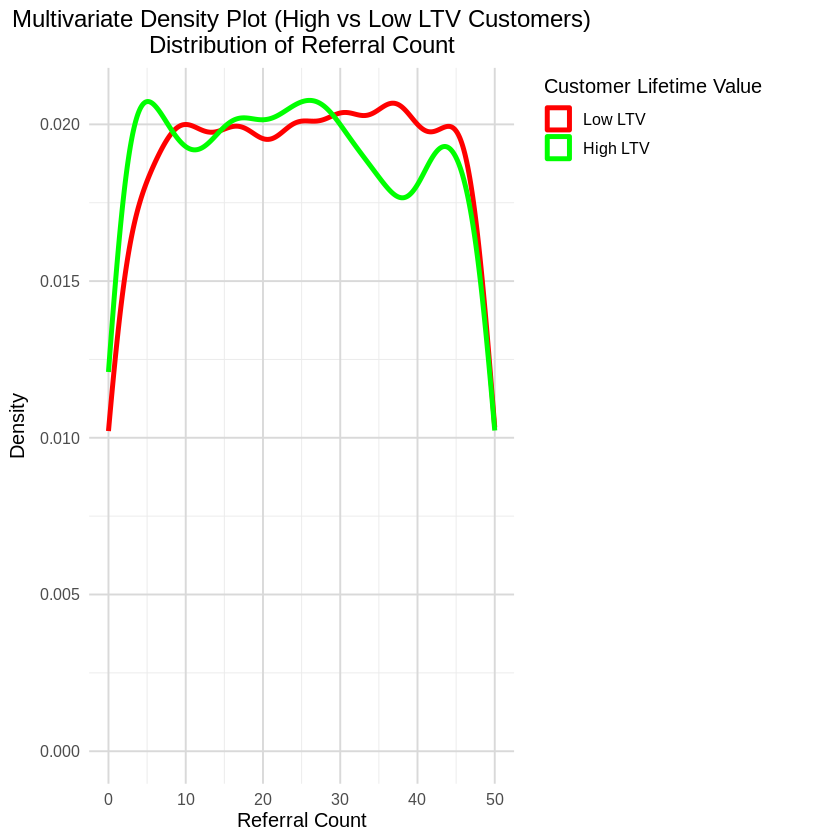

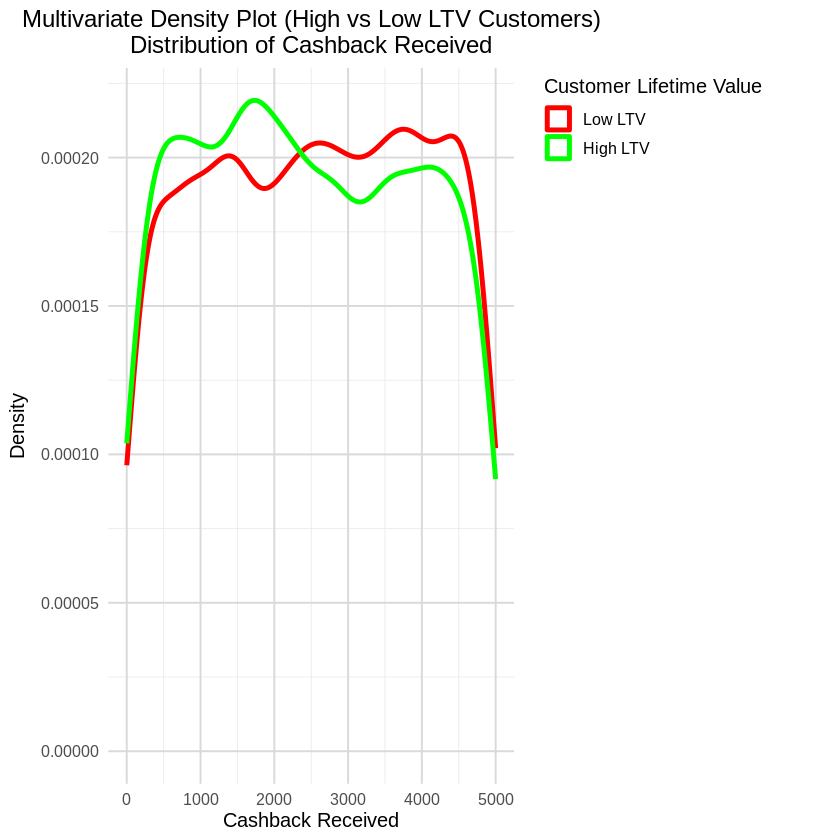

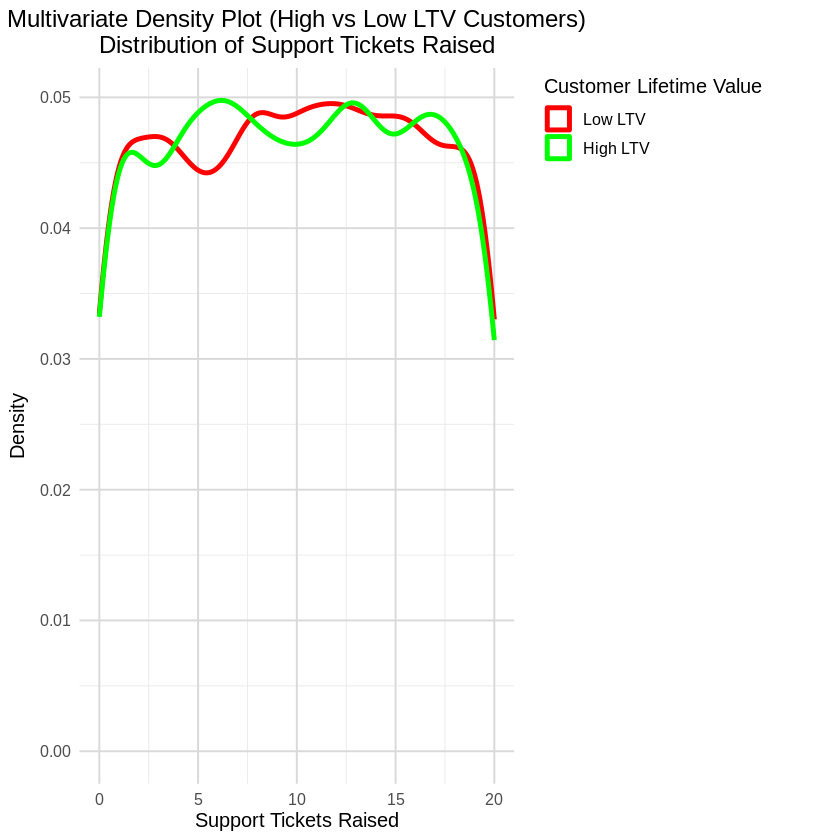

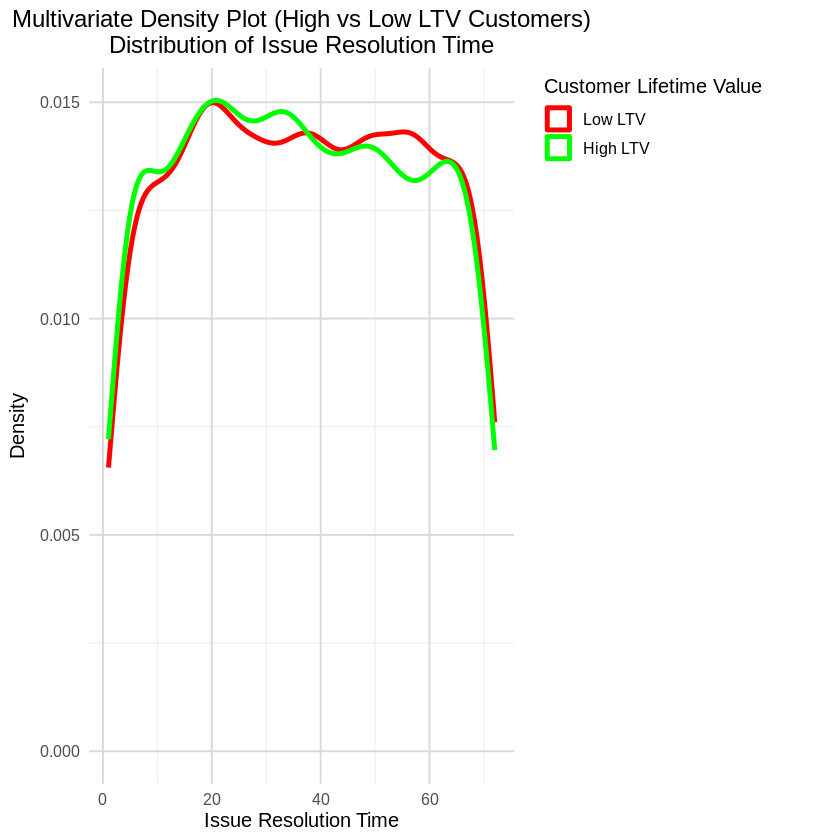

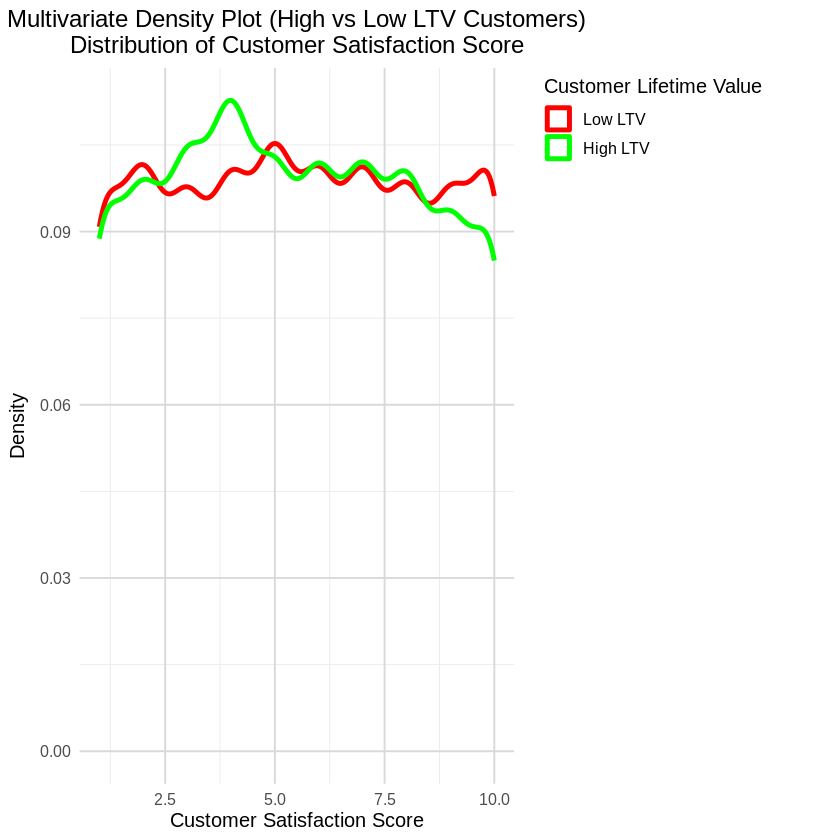

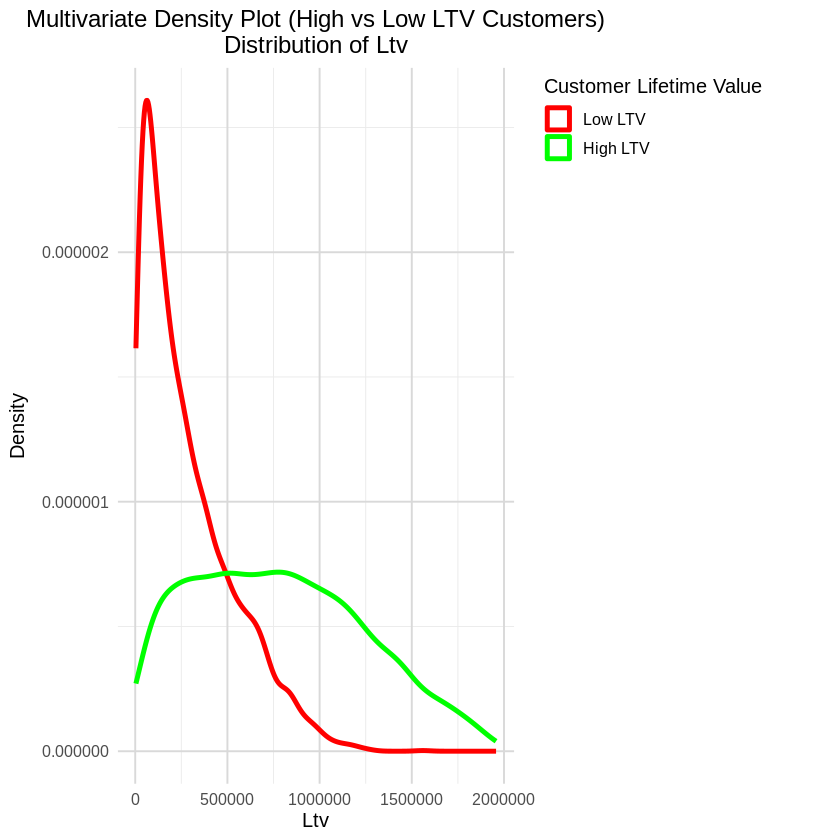

In [ ]:
for (col in numeric_cols) {
  print(multi_group_density_plot(clustered_data, col))
}


In [ ]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)

# numeric columns only
numeric_cols <- names(clustered_data)[sapply(clustered_data, is.numeric)]

# drop the binary label
numeric_cols <- setdiff(numeric_cols, "high_ltv")


numeric_cols <- numeric_cols[1:14]
numeric_cols


[1] "age"                         "total_transactions"         
 [3] "avg_transaction_value"       "max_transaction_value"      
 [5] "min_transaction_value"       "total_spent"                
 [7] "active_days"                 "last_transaction_days_ago"  
 [9] "loyalty_points_earned"       "referral_count"             
[11] "cashback_received"           "support_tickets_raised"     
[13] "issue_resolution_time"       "customer_satisfaction_score"

In [ ]:
long_df <- clustered_data[, c("customer_value", numeric_cols)]

long_df <- tidyr::pivot_longer(
  long_df,
  cols      = all_of(numeric_cols),
  names_to  = "feature",
  values_to = "value"
)


Warning message in geom_boxplot(outlier_size = 0.7):
“Ignoring unknown parameters: `outlier_size`”


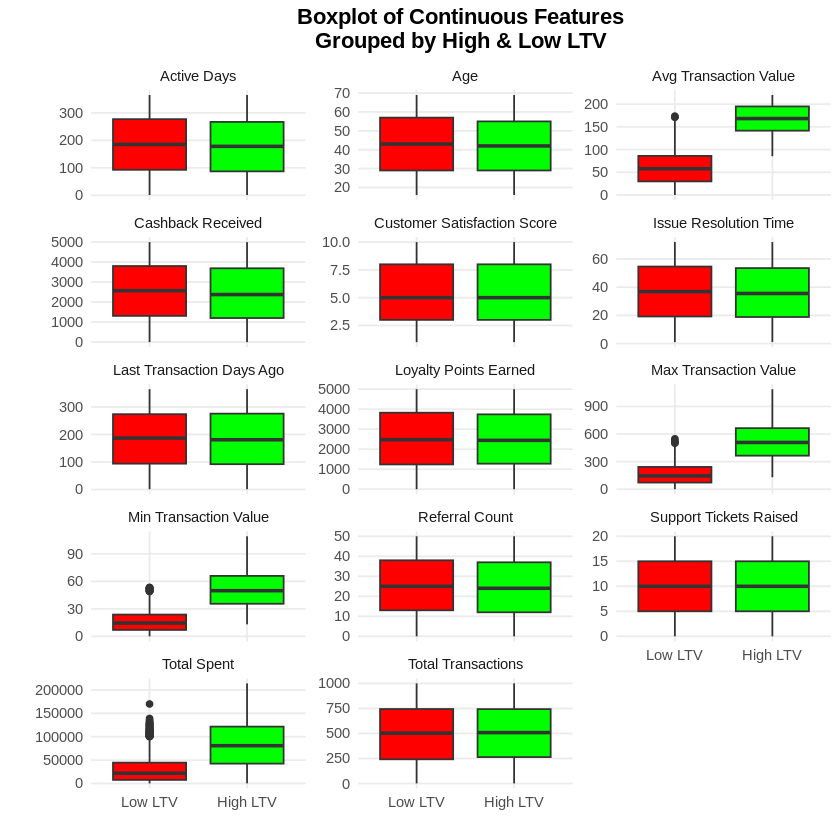

In [ ]:
p <- ggplot(long_df, aes(x = customer_value, y = value, fill = customer_value)) +
  geom_boxplot(outlier_size = 0.7) +
  scale_x_discrete(labels = c("Low" = "Low LTV", "High" = "High LTV")) +
  scale_fill_manual(values = c("Low" = "red", "High" = "green")) +
  facet_wrap(
    ~ feature,
    nrow   = 5,
    ncol   = 3,
    scales = "free_y",
    labeller = labeller(
      feature = function(x) str_to_title(gsub("_", " ", x))
    )
  ) +
  labs(
    title = "Boxplot of Continuous Features\nGrouped by High & Low LTV",
    x     = "",
    y     = ""
  ) +
  theme_minimal(base_size = 11) +
  theme(
    plot.title      = element_text(hjust = 0.5, face = "bold"),
    legend.position = "none",
    panel.grid.minor = element_blank()
  )

p


73.94% of the labels can truly be defined as 'accurate'.
26.06% of the labels can truly be defined as 'inaccurate'.


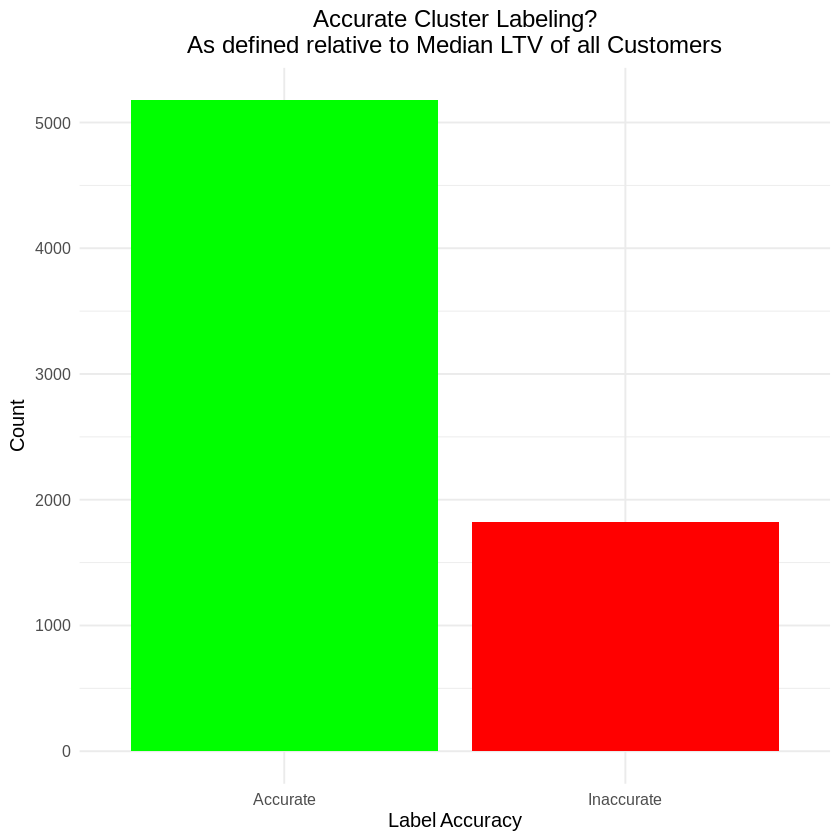

In [ ]:
library(dplyr)
library(ggplot2)

# 1. Start from clustered_data and rename like in Python -------------------

label_df <- clustered_data %>%
  dplyr::rename(
    ltv_cluster_label   = customer_value,
    is_label_profitable = high_ltv
  )

# 2. Define "true" high LTV relative to median LTV of all customers -------

median_ltv <- median(label_df$ltv, na.rm = TRUE)

label_df <- label_df %>%
  mutate(
    median_ltv_high = if_else(ltv >= median_ltv, 1L, 0L)
  )

# 3. Split into accurate vs inaccurate labels -----------------------------

accurate_labels <- label_df %>%
  filter(is_label_profitable == median_ltv_high)

inaccurate_labels <- label_df %>%
  filter(is_label_profitable != median_ltv_high)

# 4. Counts and percentages ----------------------------------------------

accurate_count   <- nrow(accurate_labels)
inaccurate_count <- nrow(inaccurate_labels)
total_count      <- accurate_count + inaccurate_count

acc_pct  <- round(accurate_count   / total_count * 100, 2)
inacc_pct <- round(inaccurate_count / total_count * 100, 2)

cat(sprintf("%.2f%% of the labels can truly be defined as 'accurate'.\n",   acc_pct))
cat(sprintf("%.2f%% of the labels can truly be defined as 'inaccurate'.\n", inacc_pct))

# 5. Bar plot data --------------------------------------------------------

plot_data <- data.frame(
  Label_Accuracy = c("Accurate", "Inaccurate"),
  Count          = c(accurate_count, inaccurate_count)
)

# 6. Bar chart (green = Accurate, red = Inaccurate) -----------------------

ggplot(plot_data, aes(x = Label_Accuracy, y = Count, fill = Label_Accuracy)) +
  geom_col() +
  scale_fill_manual(values = c("Accurate" = "green", "Inaccurate" = "red")) +
  labs(
    title = "Accurate Cluster Labeling?\nAs defined relative to Median LTV of all Customers",
    x     = "Label Accuracy",
    y     = "Count"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title      = element_text(hjust = 0.5),
    legend.position = "none"
  )


# Transition to Supervised Learning

In [ ]:
library(dplyr)

# Creating binary target ltv_01
# (1 = at/above median LTV, 0 = below)
data_for_supervised <- data_for_supervised %>%
  mutate(
    ltv_01 = if_else(
      ltv >= median(ltv, na.rm = TRUE),
      1L, 0L
    )
  )

# 2. Copy to df and rename ltv_01 -> ltv_true_label
df <- data_for_supervised %>%
  dplyr::rename(
    ltv_true_label = ltv_01
  )

# 3. Inspect first rows
head(df)


age,total_transactions,avg_transaction_value,max_transaction_value,min_transaction_value,total_spent,active_days,last_transaction_days_ago,loyalty_points_earned,referral_count,⋯,location_Suburban,location_Urban,income_level_Low,income_level_Middle,app_usage_frequency_Monthly,app_usage_frequency_Weekly,preferred_payment_method_Debit Card,preferred_payment_method_UPI,preferred_payment_method_Wallet Balance,ltv_true_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
54,192,184.10022,662.3852,71.78396,35347.24,140,209,2114,25,⋯,0,1,1,0,1,0,1,0,0,0
67,979,159.90408,531.8511,24.05416,156546.10,229,240,2960,20,⋯,1,0,0,0,1,0,0,1,0,1
44,329,77.67510,357.7327,30.17747,25555.11,73,21,3170,0,⋯,0,1,0,0,1,0,1,0,0,0
30,71,180.69564,196.1069,47.96863,12829.39,299,285,4756,35,⋯,0,0,0,0,0,1,0,0,1,0
58,878,118.80102,192.4740,49.86160,104307.29,236,329,1992,18,⋯,0,1,0,1,0,0,0,1,0,1
23,741,67.02479,234.4194,22.76606,49665.37,195,93,3231,5,⋯,0,0,0,1,0,0,0,1,0,1


In [ ]:
library(dplyr)

X <- df[, !(names(df) %in% c("ltv_true_label", "ltv"))]
   # X==all predictor features


In [ ]:
# compute high/low percentages
label_counts <- df$ltv_true_label %>% table() %>% prop.table()

perc_high <- label_counts["1"]
perc_low  <- label_counts["0"]

cat(sprintf("%.1f%% are High LTV\n", perc_high*100))
cat(sprintf("%.1f%% are Low LTV\n",  perc_low*100))

50.0% are High LTV
50.0% are Low LTV


In [ ]:
# target variable
y_class <- df$ltv_true_label

In [ ]:
library(caret)

set.seed(0)

# stratified split: 90% training, 10% validation
train_index <- createDataPartition(y_class, p = 0.9, list = FALSE)

X_train <- X[train_index, ]
X_val   <- X[-train_index, ]

y_train <- y_class[train_index]
y_val   <- y_class[-train_index]


In [ ]:
cat("Training set proportions:\n")
print(prop.table(table(y_train)))

cat("\nValidation set proportions:\n")
print(prop.table(table(y_val)))


Training set proportions:
y_train
  0   1 
0.5 0.5 

Validation set proportions:
y_val
  0   1 
0.5 0.5 


# Feature Importance

## Single Tree

In [ ]:
library(rpart)
library(dplyr)

# 1. Fit a single decision tree (classification)
train_df <- data.frame(X_train, y_train = factor(y_train))

set.seed(0)
tree_model <- rpart(
  y_train ~ .,
  data   = train_df,
  method = "class"
)

# 2. Get importance for all predictors -----------------------------

all_feats <- colnames(X_train)

# rpart only returns non-zero importances; start everyone at 0
imp_vec <- setNames(rep(0, length(all_feats)), all_feats)

if (!is.null(tree_model$variable.importance)) {
  imp_vec[names(tree_model$variable.importance)] <-
    tree_model$variable.importance
}

# 3. Build importance table like the pandas DataFrame --------------

importance_df <- data.frame(
  feature    = all_feats,
  importance = as.numeric(imp_vec),
  row.names  = all_feats
)

importance_df <- importance_df %>%
  dplyr::arrange(desc(importance))

importance_df


,feature,importance
,<chr>,<dbl>
total_spent,total_spent,3112.1526
avg_transaction_value,avg_transaction_value,1698.3489
total_transactions,total_transactions,1583.3411
max_transaction_value,max_transaction_value,1464.3674
min_transaction_value,min_transaction_value,1457.4273
support_tickets_raised,support_tickets_raised,100.1362
age,age,0.0000
active_days,active_days,0.0000
last_transaction_days_ago,last_transaction_days_ago,0.0000


In [ ]:
library(rpart)
library(dplyr)

## 1. Drop total_spent from X_train and X_val -----------------------------

X_train <- X_train[, !(names(X_train) %in% "total_spent")]
X_val   <- X_val[,   !(names(X_val)   %in% "total_spent")]

## 2. Fit a new single tree on the reduced predictors --------------------

train_df_drop <- data.frame(X_train, y_train = factor(y_train))

set.seed(0)
tree_model_drop <- rpart(
  y_train ~ .,
  data   = train_df_drop,
  method = "class",
  parms  = list(split = "gini"),
  control = rpart.control(
    cp        = 0,
    minsplit  = 2,
    minbucket = 1,
    maxdepth  = 30,
    xval      = 0
  )
)

## 3. Compute (normalized) feature importances ---------------------------

all_feats2 <- colnames(X_train)
imp_vec2   <- setNames(rep(0, length(all_feats2)), all_feats2)

if (!is.null(tree_model_drop$variable.importance)) {
  imp_vec2[names(tree_model_drop$variable.importance)] <- tree_model_drop$variable.importance
}

importance_df_drop <- data.frame(
  feature    = names(imp_vec2),
  importance = as.numeric(imp_vec2)
) %>%
  mutate(importance = importance / sum(importance)) %>%  # sum to 1
  arrange(desc(importance)) %>%
  tibble::column_to_rownames("feature")

importance_df_drop


,importance
,<dbl>
avg_transaction_value,0.3249766888
total_transactions,0.3120177988
max_transaction_value,0.1679459712
min_transaction_value,0.1662895838
age,0.0052443484
issue_resolution_time,0.0049003954
support_tickets_raised,0.0043527994
active_days,0.0042112447
last_transaction_days_ago,0.0026663012


In [ ]:
library(rpart)
library(dplyr)

# ---------------------------------------------------------------------
# 1. Drop total_transactions from both X_train and X_val
# ---------------------------------------------------------------------

X_train <- X_train[, !(names(X_train) %in% "total_transactions")]
X_val   <- X_val[,   !(names(X_val)   %in% "total_transactions")]

# ---------------------------------------------------------------------
# 2. Fit a new single decision tree using remaining features
# ---------------------------------------------------------------------

train_df_drop2 <- data.frame(X_train, y_train = factor(y_train))

set.seed(0)
tree_model_drop2 <- rpart(
  y_train ~ .,
  data   = train_df_drop2,
  method = "class",
  parms  = list(split = "gini"),
  control = rpart.control(
    cp        = 0,
    minsplit  = 2,
    minbucket = 1,
    maxdepth  = 30,
    xval      = 0
  )
)

# ---------------------------------------------------------------------
# 3. Compute normalized feature importances (sklearn-style)
# ---------------------------------------------------------------------

all_feats3 <- colnames(X_train)
imp_vec3   <- setNames(rep(0, length(all_feats3)), all_feats3)

if (!is.null(tree_model_drop2$variable.importance)) {
  imp_vec3[names(tree_model_drop2$variable.importance)] <-
    tree_model_drop2$variable.importance
}

single_tree_importance <- data.frame(
  feature    = names(imp_vec3),
  importance = as.numeric(imp_vec3)
) %>%
  mutate(importance = importance / sum(importance)) %>%  # normalize to 1
  arrange(desc(importance)) %>%
  tibble::column_to_rownames("feature")

# ---------------------------------------------------------------------
# 4. Display final table
# ---------------------------------------------------------------------
single_tree_importance


,importance
,<dbl>
avg_transaction_value,0.255369350
max_transaction_value,0.169851728
min_transaction_value,0.164785692
age,0.062923999
active_days,0.049449303
loyalty_points_earned,0.047848547
last_transaction_days_ago,0.045030964
cashback_received,0.044146275
referral_count,0.039966761


## Ensemble of Base Estimators

In [ ]:
X_train_with_avg_transaction <- X_train

In [ ]:
head(X_train_with_avg_transaction)

age,avg_transaction_value,max_transaction_value,min_transaction_value,active_days,last_transaction_days_ago,loyalty_points_earned,referral_count,cashback_received,support_tickets_raised,⋯,customer_satisfaction_score,location_Suburban,location_Urban,income_level_Low,income_level_Middle,app_usage_frequency_Monthly,app_usage_frequency_Weekly,preferred_payment_method_Debit Card,preferred_payment_method_UPI,preferred_payment_method_Wallet Balance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
54,184.10022,662.3852,71.78396,140,209,2114,25,2224.012,3,⋯,1,0,1,1,0,1,0,1,0,0
67,159.90408,531.8511,24.05416,229,240,2960,20,4026.824,17,⋯,8,1,0,0,0,1,0,0,1,0
44,77.67510,357.7327,30.17747,73,21,3170,0,1441.011,11,⋯,4,0,1,0,0,1,0,1,0,0
30,180.69564,196.1069,47.96863,299,285,4756,35,4365.856,6,⋯,1,0,0,0,0,0,1,0,0,1
58,118.80102,192.4740,49.86160,236,329,1992,18,4161.524,18,⋯,5,0,1,0,1,0,0,0,1,0
23,67.02479,234.4194,22.76606,195,93,3231,5,2597.393,6,⋯,10,0,0,0,1,0,0,0,1,0


In [ ]:
y_train <- as.factor(y_train)

In [ ]:
set.seed(0)

bag_with_avg <- randomForest::randomForest(
  x          = X_train_with_avg_transaction,
  y          = y_train,
  ntree      = 100,
  mtry       = ncol(X_train_with_avg_transaction),
  importance = TRUE
)


In [ ]:
set.seed(0)

# Bagging using randomForest with mtry = number of predictors (pure bagging)
bag_with_avg <- randomForest::randomForest(
  x          = X_train_with_avg_transaction,
  y          = y_train,
  ntree      = 100,                               # same as n_estimators=100
  mtry       = ncol(X_train_with_avg_transaction),# use all features at each split
  importance = TRUE
)

# Feature importance table (similar to your Python DF)
bagged_feature_importances_with_avg <- randomForest::importance(bag_with_avg, type = 2) %>%
  as.data.frame() %>%
  dplyr::select(importance = MeanDecreaseGini) %>%
  tibble::rownames_to_column("feature") %>%
  dplyr::arrange(dplyr::desc(importance))

bagged_feature_importances_with_avg


feature,importance
<chr>,<dbl>
avg_transaction_value,1365.23604
loyalty_points_earned,179.25881
cashback_received,178.51439
max_transaction_value,174.62796
min_transaction_value,173.29137
issue_resolution_time,171.71985
active_days,157.10725
last_transaction_days_ago,154.23502
age,135.37716


In [ ]:

# --------------------------------------------------------------------
# 1. Drop monetary variables (X_train_without / X_val_without)
#    Python analogue:
#    X_train_without = X_train.drop(['avg_transaction_value','max_transaction_value','min_transaction_value'], axis=1)
#    X_val_without   = X_val.drop([...], axis=1)
# --------------------------------------------------------------------
X_train_without <- X_train %>%
  dplyr::select(
    -avg_transaction_value,
    -max_transaction_value,
    -min_transaction_value
  )

X_val_without <- X_val %>%
  dplyr::select(
    -avg_transaction_value,
    -max_transaction_value,
    -min_transaction_value
  )

# --------------------------------------------------------------------
# 2. Bagging model on X_train_without
#    Python analogue:
#    bag.fit(X_train_without, y_train)
# --------------------------------------------------------------------
y_train <- as.factor(y_train)

set.seed(0)
bag <- randomForest::randomForest(
  x          = X_train_without,
  y          = y_train,
  ntree      = 100,                     # n_estimators=100
  mtry       = ncol(X_train_without),   # pure bagging (all predictors at each split)
  importance = TRUE
)

# --------------------------------------------------------------------
# 3. Feature importance table (no monetary variables)
#    Python analogue:
#    averaged_importances = np.mean([tree.feature_importances_ ...])
#    bagged_feature_importances_no_monetary = pd.DataFrame({
#        'feature': X_train_without.columns,
#        'importance': averaged_importances
#    }).sort_values(...).set_index('feature')
# --------------------------------------------------------------------
imp <- randomForest::importance(bag)  # matrix of importances

bagged_feature_importances_no_monetary <- data.frame(
  feature    = rownames(imp),
  importance = imp[, ncol(imp)],
  row.names  = NULL                    # important: drop existing rownames
) %>%
  dplyr::arrange(dplyr::desc(importance)) %>%
  tibble::column_to_rownames("feature")  # now set feature as row index (like set_index)

bagged_feature_importances_no_monetary


,importance
,<dbl>
cashback_received,390.80699
issue_resolution_time,387.35836
loyalty_points_earned,378.78846
last_transaction_days_ago,359.76785
active_days,357.26664
age,295.06921
referral_count,288.98572
support_tickets_raised,209.18070
customer_satisfaction_score,170.43023


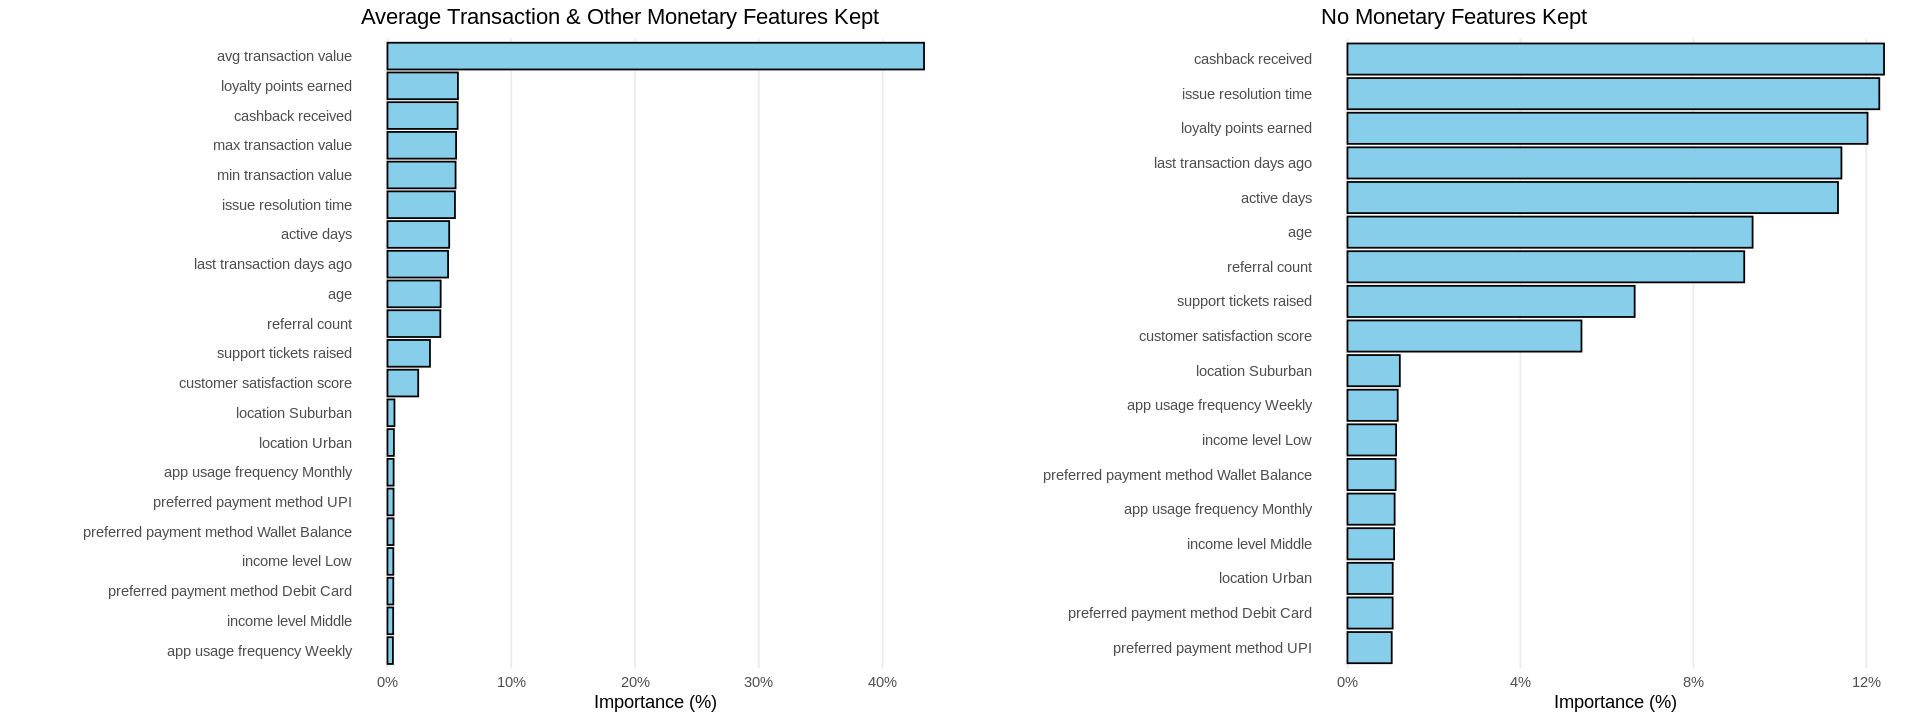

In [ ]:
library(ggplot2)
library(dplyr)
library(tibble)
library(scales)
library(gridExtra)

# Helper: take any importance table and return
#   feature, importance, importance_pct
prep_importance_table <- function(df) {
  df2 <- as.data.frame(df)

  # If feature column doesn't exist, pull it from rownames
  if (!"feature" %in% names(df2)) {
    df2 <- tibble::rownames_to_column(df2, "feature")
  }

  # Pick the last non-feature column as the importance measure
  imp_cols  <- setdiff(names(df2), "feature")
  imp_name  <- tail(imp_cols, 1)

  df2 %>%
    dplyr::select(feature, importance = dplyr::all_of(imp_name)) %>%
    dplyr::mutate(
      feature        = gsub("_", " ", feature),
      importance_pct = importance / sum(importance)
    )
}

# ----------------------------
# WITH monetary variables kept
# ----------------------------
plot_with_avg <- prep_importance_table(bagged_feature_importances_with_avg)

p_with_avg <- ggplot(plot_with_avg,
                     aes(x = importance_pct,
                         y = reorder(feature, importance_pct))) +
  geom_col(fill = "skyblue", color = "black") +
  labs(
    title = "Average Transaction & Other Monetary Features Kept",
    x     = "Importance (%)",
    y     = NULL
  ) +
  scale_x_continuous(labels = percent_format(accuracy = 1)) +
  theme_minimal() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor   = element_blank()
  )

# ----------------------------
# NO monetary variables kept
# ----------------------------
plot_no_monetary <- prep_importance_table(bagged_feature_importances_no_monetary)

p_no_monetary <- ggplot(plot_no_monetary,
                        aes(x = importance_pct,
                            y = reorder(feature, importance_pct))) +
  geom_col(fill = "skyblue", color = "black") +
  labs(
    title = "No Monetary Features Kept",
    x     = "Importance (%)",
    y     = NULL
  ) +
  scale_x_continuous(labels = percent_format(accuracy = 1)) +
  theme_minimal() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.grid.minor   = element_blank()
  )

# ----------------------------
# Arrange side by side (1 row, 2 columns)
# ----------------------------
options(repr.plot.width = 16, repr.plot.height = 6)

gridExtra::grid.arrange(p_with_avg, p_no_monetary, ncol = 2)



# Decision Tree To Try and Better Understand Demographics of High/Low CLTV Profile (see if able to predict classes as well)

In [ ]:
# ---------------------------------------------------
# 1. Prepare training data (non-monetary predictors)
# ---------------------------------------------------
# Make sure train and validation use the same, safe column names

X_train_without <- as.data.frame(X_train_without)
X_val_without   <- as.data.frame(X_val_without)

# Convert to syntactic names (spaces -> dots, etc.) in BOTH
names(X_train_without) <- make.names(names(X_train_without))
names(X_val_without)   <- make.names(names(X_val_without))

# Now build the training data frame for rpart
train_df_no_monetary <- data.frame(X_train_without, y_train = y_train)


In [ ]:
# ---------------------------------------------------
# 2. Define hyperparameter grid
# ---------------------------------------------------
param_grid <- expand.grid(
  maxdepth = c(2, 4, 6, 8, 10, 12),
  minsplit = c(2, 5, 10),
  minbucket = c(1, 2, 5)
)

In [ ]:
# 5-fold CV, stratified
folds <- createFolds(y_train, k = 5, list = TRUE, returnTrain = FALSE)

cv_results <- param_grid
cv_results$mean_accuracy <- NA_real_

In [ ]:
# ---------------------------------------------------
# 3. Manual 5-fold CV over grid
# ---------------------------------------------------
for (i in seq_len(nrow(param_grid))) {
  params <- param_grid[i, ]
  acc_vec <- numeric(length(folds))

  for (fold_idx in seq_along(folds)) {
    val_idx  <- folds[[fold_idx]]
    train_idx <- setdiff(seq_len(nrow(train_df_no_monetary)), val_idx)

    train_fold <- train_df_no_monetary[train_idx, ]
    val_fold   <- train_df_no_monetary[val_idx, ]

    # Fit rpart tree with current hyperparameters
    tree_cv <- rpart(
      y_train ~ .,
      data = train_fold,
      control = rpart.control(
        maxdepth = params$maxdepth,
        minsplit = params$minsplit,
        minbucket = params$minbucket,
        cp       = 0.0  # let depth/minsplit/minbucket control complexity
      )
    )

    # Predict on validation fold
    preds_val <- predict(tree_cv, newdata = val_fold, type = "class")
    acc_vec[fold_idx] <- mean(preds_val == val_fold$y_train)
  }

  cv_results$mean_accuracy[i] <- mean(acc_vec)
}


In [ ]:
# ---------------------------------------------------
# 4. Choose best hyperparameters (highest CV accuracy)
# ---------------------------------------------------
best_row <- cv_results %>%
  arrange(desc(mean_accuracy)) %>%
  slice(1)

best_row
# You can print this to inspect best maxdepth/minsplit/minbucket

maxdepth,minsplit,minbucket,mean_accuracy
<dbl>,<dbl>,<dbl>,<dbl>
8,2,5,0.5069841


In [ ]:
# ---------------------------------------------------
# 5. Fit final tree on full training set using best params
# ---------------------------------------------------
classTree_best <- rpart(
  y_train ~ .,
  data = train_df_no_monetary,
  control = rpart.control(
    maxdepth = best_row$maxdepth,
    minsplit = best_row$minsplit,
    minbucket = best_row$minbucket,
    cp       = 0.0
  )
)


Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


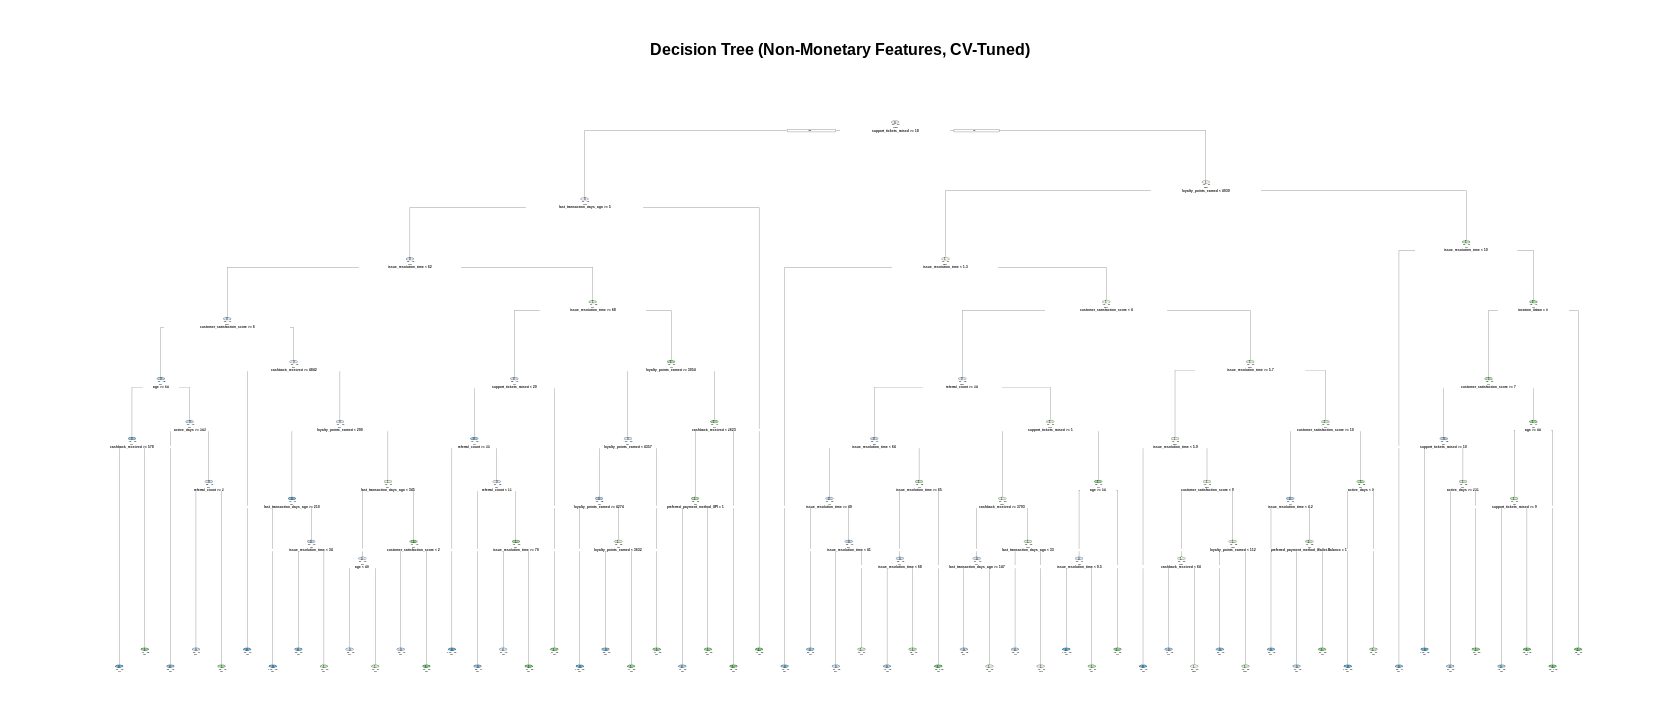

In [ ]:
# ---------------------------------------------------
# 6. Plot the best tree (similar to Python plotDecisionTree)
# ---------------------------------------------------
options(repr.plot.width = 14, repr.plot.height = 6)

rpart.plot(
  classTree_best,
  type          = 2,    # splits on branches, labels on nodes
  extra         = 104,  # class, prob, and percentage of obs
  under         = TRUE,
  fallen.leaves = TRUE,
  main          = "Decision Tree (Non-Monetary Features, CV-Tuned)"
)

In [ ]:
# ---------------------------------------------------
# 7. Assessment on holdout data (X_val_without --> y_val)
# ---------------------------------------------------
pred_val <- predict(
  classTree_best,
  newdata = as.data.frame(X_val_without),
  type = "class"
)

# Ensure both are factors with the same levels
y_val    <- factor(y_val)                         # if not already factor
pred_val <- factor(pred_val, levels = levels(y_val))

conf_mat <- confusionMatrix(pred_val, y_val)
conf_mat


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  69  86
         1 281 264
                                             
               Accuracy : 0.4757             
                 95% CI : (0.4382, 0.5135)   
    No Information Rate : 0.5                
    P-Value [Acc > NIR] : 0.9071             
                                             
                  Kappa : -0.0486            
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.19714            
            Specificity : 0.75429            
         Pos Pred Value : 0.44516            
         Neg Pred Value : 0.48440            
             Prevalence : 0.50000            
         Detection Rate : 0.09857            
   Detection Prevalence : 0.22143            
      Balanced Accuracy : 0.47571            
                                             
       'Positive